# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = df1.iloc[:, 32:]
X.dropna()
y.dropna()

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    #ignore = ["age", "Medu", "Fedu","Mjob", "Fjob", 'reason', 'guardian','traveltime', 'studytime',
    #       'failures']
    #print(X.columns)
    #print(X.iloc[0,:])
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape)
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Linear Regression

## 1. Multiple Linear Regression

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.          0.73094388  0.83337685 ... -0.99769466  1.01290255
  -0.78915946]
 [ 1.         -1.36809408  0.83337685 ... -0.99769466 -1.06301457
  -0.57351125]
 [ 1.          0.73094388  0.83337685 ...  0.56067799  1.01290255
   0.50472977]
 ...
 [ 1.         -1.36809408  0.83337685 ... -0.21850834  0.32093018
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ... -0.99769466  1.01290255
   0.50472977]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466 -1.06301457
   0.07343336]]


In [11]:
def compute_cost(X_1, y_2d, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    
    # TODO Q07 - Taken from hw
    # Write the cost function
    #ISSUES: X AND Y ARE NOW 2D ARRAYS
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [12]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # TODO Q08
    # Finish the gradient descent function
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [13]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
#print(g)
print("g[0]: ", g[0][0])

g[0]:  11.906789968279758


In [14]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    # TODO 09 
    # Complete the function
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

In [15]:
#Testing numbers on training set
learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
num_iters = [10,100, 1000, 10000]
track = {}
best_rsq = 0
for nums in num_iters:
    print("*"* 50)
    print(nums)
    for alpha in learning_rate:
        results = multiple_linear_reg_model_gda(X_1_train, y_2d_train, alpha, n_train, nums)
        print("Iter is:", nums, "Alpha is:", alpha)
        #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        #print('-'*50)
        rss = 0
        for i in range(n_train):
            rss += np.sum((np.dot(results[0].T,X_1_train[i])-y_2d_train[i])**2)
        tss = np.sum((y_2d_train-np.mean(y_2d_train))**2) # TSS 
        print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print(rsq)
        if best_rsq<rsq:
            best_rsq = rsq
            track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":rsq}
        print('-'*50)
    print("*"* 50)

**************************************************
10
Iter is: 10 Alpha is: 0.01

initial cost:  76.7879177377892 
final cost:  62.970395877041675
RSS: 48990.967992338425 TSS: 3748.997429305912
-12.067751823294419
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  76.7879177377892 
final cost:  29.098204331602762
RSS: 22638.40296998695 TSS: 3748.997429305912
-5.038521870680027
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  76.7879177377892 
final cost:  75.27264244655025
RSS: 58562.11582341609 TSS: 3748.997429305912
-14.620740458671975
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  76.7879177377892 
final cost:  69.65715765286984
RSS: 54193.26865393274 TSS: 3748.997429305912
-13.455402991291477
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  76.7879177377892 
final cost:  69.51910279121806
RSS: 54085.8

In [16]:
# The best rsq on training set based off gradient method
print("Best rsq based off the testing different iters and alpha:")
for i in track.items():
    print(i[0],": ",i[1] )

Best rsq based off the testing different iters and alpha:
(10000, 0.01) :  (array([[ 1.20141801e+01],
       [ 5.44086436e-01],
       [ 1.70079889e-01],
       [ 3.05935336e-01],
       [ 1.25575681e-02],
       [ 1.40127661e-01],
       [ 7.23264439e-04],
       [ 1.71723240e-01],
       [ 2.01866269e-01],
       [-3.43902248e-02],
       [ 2.99141914e-01],
       [-7.99476674e-01],
       [-4.21148182e-01],
       [-7.20579131e-02],
       [-1.65045191e-01],
       [ 2.93040155e-01],
       [-8.00133201e-02],
       [ 5.84297947e-01],
       [ 1.37553076e-02],
       [-4.58568621e-01],
       [ 2.26078821e-01],
       [-1.48163119e-01],
       [-2.04435551e-01],
       [-2.10100472e-01],
       [-6.92100915e-02],
       [-3.63068485e-01],
       [-2.96738911e-01]]), 76.7879177377892, 3.0795989399092667)
RSS :  2395.9279752494085
TSS :  3748.997429305912
rsq :  0.36091501249895774


# Using sklearn library to calculate

In [17]:
#Creating our regression
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [18]:
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)

The intercept w0 =  [12.01418013]
The coefficients w[1..d]= [[ 5.44086436e-01  1.70079889e-01  3.05935336e-01  1.25575681e-02
   1.40127661e-01  7.23264439e-04  1.71723240e-01  2.01866269e-01
  -3.43902248e-02  2.99141914e-01 -7.99476674e-01 -4.21148182e-01
  -7.20579131e-02 -1.65045191e-01  2.93040155e-01 -8.00133201e-02
   5.84297947e-01  1.37553076e-02 -4.58568621e-01  2.26078821e-01
  -1.48163119e-01 -2.04435551e-01 -2.10100472e-01 -6.92100915e-02
  -3.63068485e-01 -2.96738911e-01]]


In [19]:
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_train)**2)
TSS = np.sum((y_train - np.mean(y_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2395.927975
Ein = 6.159198
RMSE = 2.481773
R^2 = 0.360915


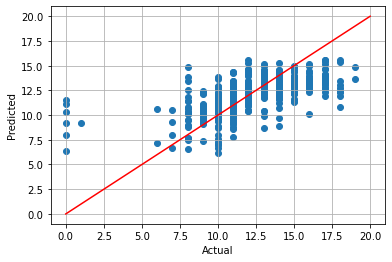

In [20]:
plt.scatter(y_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [21]:
y_test_pred = regr.predict(X_test)
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_test_pred-y_test)**2)
TSS = np.sum((y_test - np.mean(y_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2193.102665
Ein = 8.435010
RMSE = 2.904309
R^2 = 0.270462


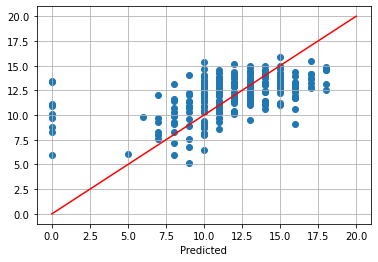

In [22]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Multiple Linear regression with regularization 

In [23]:
def gradient_descent_ridge(X_1, y_2d, learning_rate, w, N, num_iters, lamda):
    # Gradient descent on ridge regression
    #Closed form solution = (X.T * X + N*lamda*Idenitiy).inverse (X.T*y)
    identity = np.identity(w.shape[0])
    identity[0,0] = 0
    for i in range(num_iters): 
        first = np.linalg.inv(np.dot(X_1.T, X_1) + N*lamda*identity)
        second = np.dot(X_1.T, y_2d)
        ridge = np.dot(first,second)
        w = ridge
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [24]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent_ridge(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000, 0.1)
print(g)
print("g[0]: ", g[0][0])

[[ 1.20136306e+01]
 [ 4.73229812e-01]
 [ 1.46607698e-01]
 [ 2.35906919e-01]
 [ 2.95286840e-02]
 [ 1.24970259e-01]
 [-4.85292361e-03]
 [ 1.81236233e-01]
 [ 1.90288781e-01]
 [-4.68656996e-02]
 [ 2.97523254e-01]
 [-7.25535337e-01]
 [-3.83358432e-01]
 [-6.59064611e-02]
 [-1.52563577e-01]
 [ 2.64829129e-01]
 [-6.67223550e-02]
 [ 5.40848225e-01]
 [ 3.41451703e-02]
 [-4.06856697e-01]
 [ 2.12248361e-01]
 [-1.54727453e-01]
 [-1.73289875e-01]
 [-2.07912444e-01]
 [-8.67092642e-02]
 [-3.26276431e-01]
 [-2.71280886e-01]]
g[0]:  12.013630647802657
